In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Spotify_Youtube.csv to Spotify_Youtube.csv


In [4]:
df = pd.read_csv("Spotify_Youtube.csv")

In [5]:
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


Para este analisis no nos interesan los datos de Youtube, ya que el análisis se limita a Spotify, por lo que parte de la limpieza de los datos va a consistir en eliminar estas columnas. Únicamente nos vamos a quedar con las visitas y los likes de youtube, ya que con estos datos podemos analizar la correlación de visitas y 'me gusta', datos que Spotify no proporciona y que puede resultar util. También vamos a eliminar la url y uri de Spotify, ya que en este proyecto tampoco aporta información útil

In [6]:
df.drop('Url_youtube', axis=1, inplace=True)
df.drop('Title', axis=1, inplace=True)
df.drop('Channel', axis=1, inplace=True)
df.drop('Comments', axis=1, inplace=True)
df.drop('Description', axis=1, inplace=True)
df.drop('Licensed', axis=1, inplace=True)
df.drop('official_video', axis=1, inplace=True)
df.drop('Url_spotify', axis=1, inplace=True)
df.drop('Uri', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

La cantidad de datos actual es de 20718:

In [7]:
cantidad_datos = len(df)
print(cantidad_datos)

20718


De estos datos, vamos a eliminar los valores nulos y posibles duplicados para reducir el margen de error.

In [8]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

Si volvemos a ejecutar la cantidad de datos ahora obtenemos 19624

In [9]:
cantidad_datos = len(df)
print(cantidad_datos)

19624


Vamos a ver la descripción de los atributos del df y el tipo de cada dato para tener una visión más específica

In [10]:
df.describe()


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream
count,19624.000000,19624.000000,19624.000000,19624.000000,19624.000000,19624.000000,19624.000000,19624.000000,19624.000000,19624.000000,1.962400e+04,1.962400e+04,1.962400e+04,1.962400e+04
mean,0.621003,0.634961,5.294079,-7.637436,0.095306,0.289317,0.055304,0.191204,0.528777,120.583702,2.245775e+05,9.529555e+07,6.695919e+05,1.371413e+08
std,0.165457,0.213622,3.579442,4.619568,0.106188,0.286056,0.192530,0.165209,0.245383,29.609419,1.267272e+05,2.771158e+08,1.802729e+06,2.462581e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,6.574000e+03
25%,0.519000,0.508000,2.000000,-8.781250,0.035700,0.044400,0.000000,0.094000,0.338000,96.990750,1.801698e+05,1.907604e+06,2.232600e+04,1.781063e+07
50%,0.639000,0.666000,5.000000,-6.517500,0.050600,0.190000,0.000002,0.125000,0.535000,119.961500,2.132535e+05,1.483210e+07,1.275100e+05,4.979666e+07
75%,0.742000,0.797000,8.000000,-4.930750,0.104000,0.471000,0.000442,0.234000,0.725000,139.946000,2.518468e+05,7.147883e+07,5.269410e+05,1.392074e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,3.386520e+09


In [11]:
df.dtypes

Artist               object
Track                object
Album                object
Album_type           object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Views               float64
Likes               float64
Stream              float64
dtype: object

Todos los datos tienen sentido, no parece que tengamos que realizar transformaciones de tipo.

Vamos a generar un mapa de calor ordenado antes que cualquier otra visualización para detectar las correlaciones más importantes

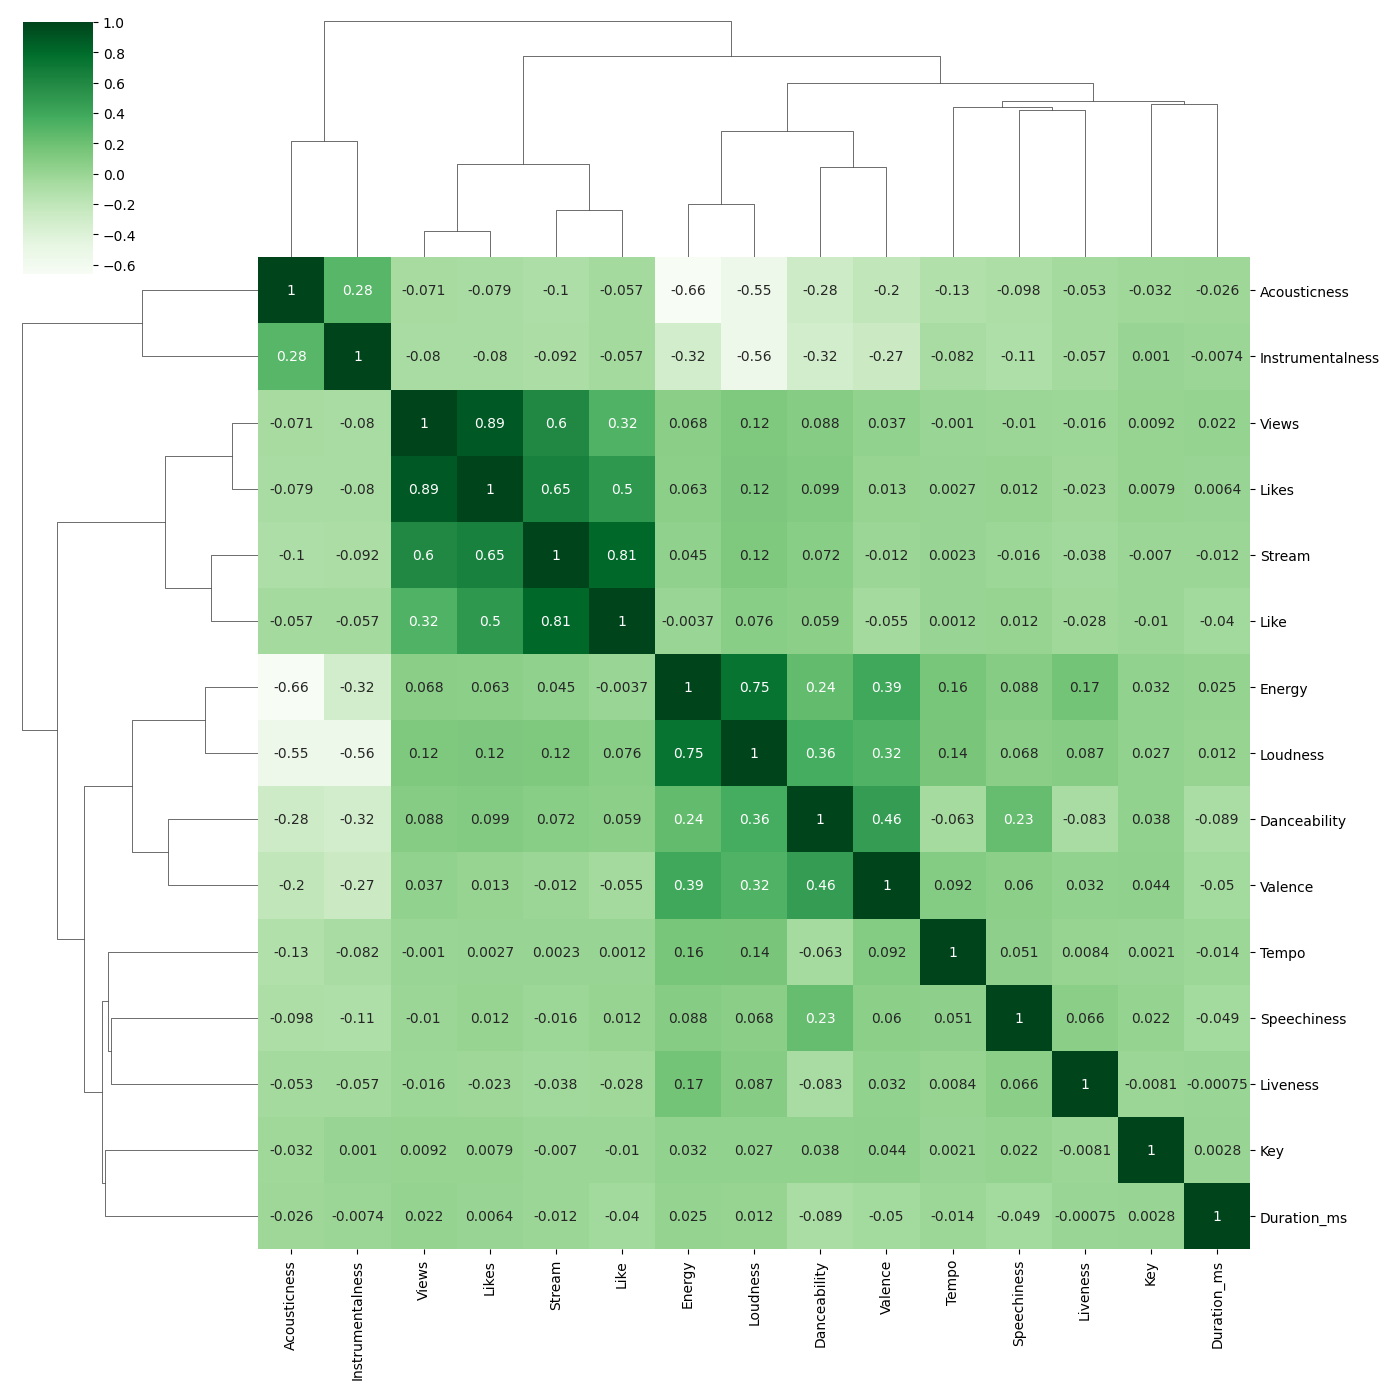

In [29]:
corr_matrix = df.corr(numeric_only=True)
sns.clustermap(corr_matrix, annot=True, cmap='Greens', figsize=(14,14))
plt.show()

Con este mapa de calor vemos relaciones con bastante sentido, como por ejemplo la energía de una canción y lo alta que está, la positividad que transmite y lo bailable que es o la cantidad de “me gustas” y sus visitas.
Al estar ordenado también podemos apreciar que los atributos más relacionados con el éxito de una canción son la energía, lo alto que suena y lo bailable que es. También vemos alguna relación negativa, como la duración de las canciones, parece que cuanto más largas son menos visitas reciben.

Lo que me parece curioso es que las visitas de Youtube y Spotify solo tienen un 0.65 de relación. Vamos a verlo más en detalle.

<Axes: xlabel='Views', ylabel='Stream'>

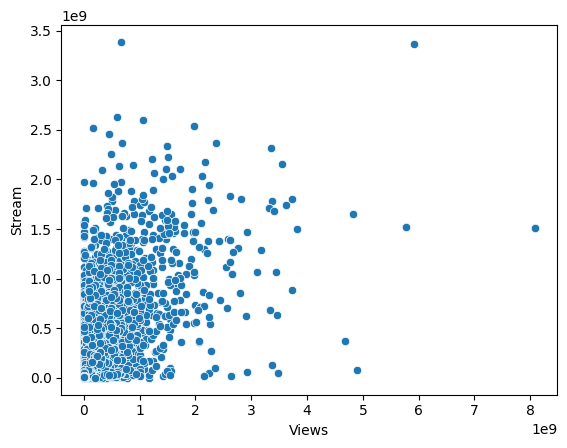

In [14]:
sns.scatterplot(data=df, x='Views', y='Stream')

No hay una relación suficiente en los datos de Youtube como para que nos aporte algo significativo, debido a que este estudio es sobre Spotify vamos a dejar de utilizar estas columnas. Si nos interesan los 'Likes', así que vamos a transformar los datos para poder utilizar estos valores.


Vamos a crear un nuevo campo llamado "Like" que sea proporcional a los Likes de Youtube pero para Spotify. Es decir, compara las visitas de Youtube con las de Spotify y según los Likes del primero, asociamos una cantidad proporcional de Likes para el segundo. De esta forma podemos analizar los datos de Spotify sin necesitar los de Youtube.

In [15]:
df['Like'] = df['Stream'] * df['Likes'] / df['Views']

Vamos a ver las canciones con más Streams

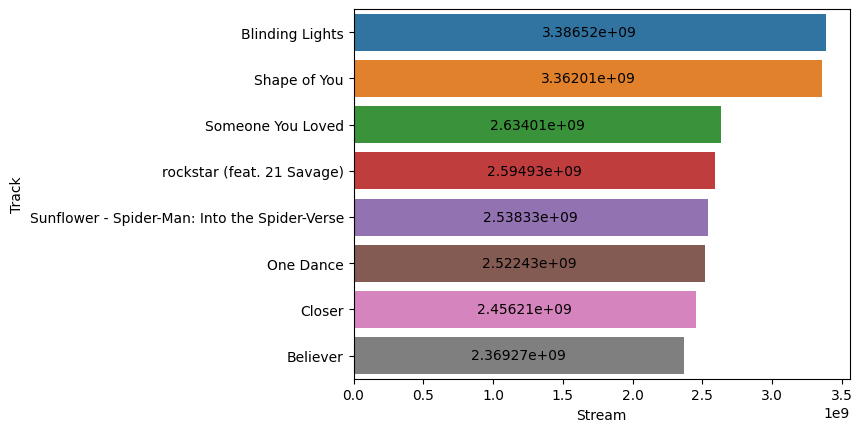

In [16]:
top_stream = df.nlargest(10,'Stream')
ax = sns.barplot(x='Stream', y='Track', data=top_stream)
for i in ax.containers:
   ax.bar_label(i,label_type='center')

Ahora vamos a ver las canciones con más Likes

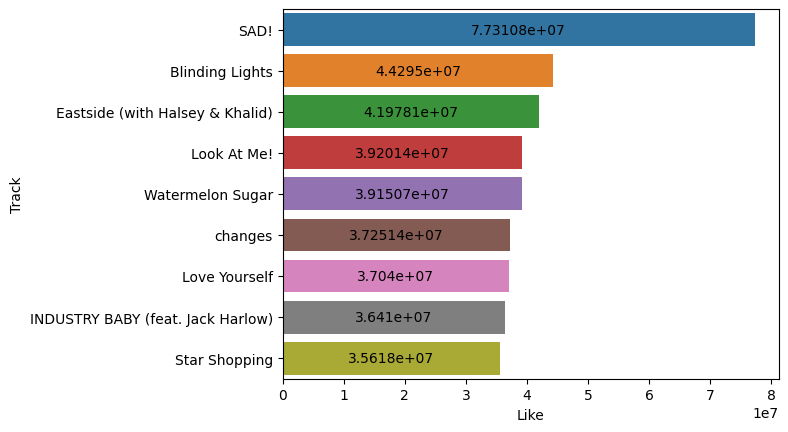

In [17]:
top_like = df.nlargest(10,'Like')
ax = sns.barplot(x='Like', y='Track', data=top_like)
for i in ax.containers:
    ax.bar_label(i,label_type='center')

Vemos que alguna coincide en el Top 10, pero no está clara la relación. Vamos a hacer un gráfico de dispersión para verlo mejor.

<Axes: xlabel='Stream', ylabel='Like'>

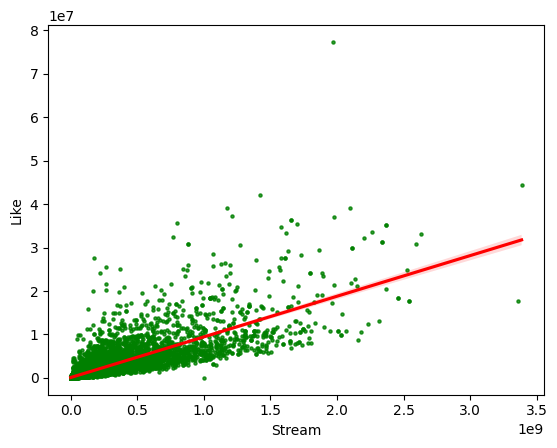

In [18]:
sns.regplot(x='Stream', y='Like', data=df, scatter_kws={"s": 5}, color="g", line_kws={"color": "r"})

Con este gráfico confirmamos una relación clara entre Streams y Likes, el Top 10 no coincide porque son casos aislados específicos que tendrán motivos ajenos (popularidad de un grupo, una polémica, un Trend en redes sociales…)

La longitud de los títulos quizás podría afectar a las visitas de una canción, ya que cuanto mas largo es un título más se tarda en escribirlo.
Vamos a comprobarlo con el coeficiente de correlación de Pearson. Si el coeficiente se acerca a 1 tendremos una correlación fuerte positiva, mientras que si se acerca a -1 la correlación serña negativa.

In [31]:
track_length = df['Track'].str.len()
corr, _ = pearsonr(track_length, df['Stream'])
print(f'Coeficiente de correlación de Pearson: {corr:.3f}')

Coeficiente de correlación de Pearson: -0.024


Como podemos ver, no hay una relación fuerte entre la longitud de las canciones y sus visitas; la poca que hay es negativa, es decir que cuanto más largo es un título menos visitas tiene, pero no suficientemente fuerte como para ser destacable. Como no es significativo, no vamos a tenerlo en cuenta para la predicción.

Ahora que ya hemos visualizado los datos y tenemos una imagen clara, vamos a comparar diferentes modelos de predicción y ver cuál será mejor predecir Streams en nuevas canciones.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


# Separamos las variables independientes y dependientes
x = df[['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']]
y = df['Stream']

# Dividimos el dataframe en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Diccionario para almacenar los resultados
results = {}

# Evaluamos la regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
results['Regresión lineal'] = mse

# Evaluamos la regresión polinómica
poly_features = PolynomialFeatures(degree=2)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)
poly_reg = LinearRegression()
poly_reg.fit(x_train_poly, y_train)
y_pred = poly_reg.predict(x_test_poly)
mse = mean_squared_error(y_test, y_pred)
results['Regresión polinómica'] = mse

# Evaluamos la regresión de árbol de decisión
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(x_train, y_train)
y_pred = tree_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
results['Regresión de árbol de decisión'] = mse

# Evaluamos la regresión de bosque aleatorio
forest_reg = RandomForestRegressor(random_state=0)
forest_reg.fit(x_train, y_train)
y_pred = forest_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
results['Regresión de bosque aleatorio'] = mse

# Evaluamos la regresión con máquinas de vectores de soporte
svm_reg = SVR(kernel='linear')
svm_reg.fit(x_train, y_train)
y_pred = svm_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
results['Regresión con máquinas de vectores de soporte'] = mse

# Mostramos los resultados
for model, mse in results.items():
    print(f'{model}: {mse:.3f}')

Regresión lineal: 61169479226854992.000
Regresión polinómica: 60646885280670336.000
Regresión de árbol de decisión: 103327607985376208.000
Regresión de bosque aleatorio: 50203723610712856.000
Regresión logística: 50203723610712856.000
Regresión con máquinas de vectores de soporte: 70673026281880000.000


Hemos calculado el error cuantico medio (MSE), y el que mejor se ajusta para este caso es el de regresión de bosque aleatorio.

In [39]:
# Creamos un ejemplo para una nueva canción
new_track = pd.DataFrame({
    'Danceability': [0.7],
    'Energy': [0.65],
    'Key': [5],
    'Loudness': [-1.2],
    'Speechiness': [0.31],
    'Acousticness': [0.02],
    'Instrumentalness': [0.12],
    'Liveness': [-0.03],
    'Valence': [0.7],
    'Tempo': [110],
    'Duration_ms': [210000]
})

# Hacemos una predicción para la nueva "Track"
stream_pred = forest_reg.predict(new_track)

# Mostramos el resultado
print(f'Predicción de Streams para la nueva Track: {stream_pred[0]:.1f}')

Predicción de Streams para la nueva Track: 466629072.6


Ahora vamos a ver en qué posición de la lista estará esta canción si las ordenamos por visitas.

In [42]:
df_sorted = df.sort_values(by='Stream', ascending=False)
index = df_sorted[df_sorted['Stream'] < stream_pred[0]].index[0]
percentile = 100 * (index + 1) / len(df)
print(f'La nueva canción sería la {index + 1} más escuchada')
print(f'La nueva canción sería más escuchada que el {percentile:.1f} % de canciones')


La nueva canción sería la 14577 más escuchada
La nueva canción sería más escuchada que el 74.3 % de canciones
